# Preparing Data

In [351]:
import pandas as pd

In [352]:
df = pd.read_csv('/content/data_porto_2.csv')

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [354]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [355]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00"
mean,"551,962.99",3.40,2.16,"2,139.35","14,852.52",1.51,0.01,0.24,3.45,"1,827.27",312.08,"1,970.79",808.61
std,"563,834.70",0.91,0.78,963.21,"35,884.44",0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,"1,900.00",0.00
25%,"322,875.00",3.00,1.75,"1,460.00","5,000.75",1.00,0.00,0.00,3.00,"1,190.00",0.00,"1,951.00",0.00
50%,"460,943.46",3.00,2.25,"1,980.00","7,683.00",1.50,0.00,0.00,3.00,"1,590.00",0.00,"1,976.00",0.00
75%,"654,962.50",4.00,2.50,"2,620.00","11,001.25",2.00,0.00,0.00,4.00,"2,300.00",610.00,"1,997.00","1,999.00"
max,"26,590,000.00",9.00,8.00,"13,540.00","1,074,218.00",3.50,1.00,4.00,5.00,"9,410.00","4,820.00","2,014.00","2,014.00"


In [356]:
# check if there is
df.duplicated().sum()

np.int64(0)

Preprocess data to what client wants:
1. House must be built after 1990.
2. If it was built before 1990, it must have been renovated once after 2000.

In [357]:
df = df[
    (df['yr_built'] > 1990) |
    ((df['yr_built'] <= 1990) & (df['yr_renovated'] > 2000))
]

In [358]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00","2,253.00"
mean,"582,413.98",3.46,2.38,"2,307.40","14,420.23",1.72,0.01,0.21,3.07,"2,059.73",247.67,"1,986.01",935.27
std,"724,004.09",0.88,0.78,"1,056.06","35,325.35",0.55,0.08,0.73,0.27,955.96,451.20,26.85,997.90
min,0.00,0.00,0.00,380.00,638.00,1.00,0.00,0.00,3.00,380.00,0.00,"1,900.00",0.00
25%,"339,000.00",3.00,2.00,"1,540.00","4,500.00",1.00,0.00,0.00,3.00,"1,296.00",0.00,"1,967.00",0.00
50%,"478,000.00",3.00,2.50,"2,140.00","7,140.00",2.00,0.00,0.00,3.00,"1,880.00",0.00,"1,997.00",0.00
75%,"675,000.00",4.00,2.50,"2,830.00","10,277.00",2.00,0.00,0.00,3.00,"2,620.00",390.00,"2,005.00","2,005.00"
max,"26,590,000.00",9.00,8.00,"13,540.00","641,203.00",3.50,1.00,4.00,5.00,"9,410.00","4,820.00","2,014.00","2,014.00"


# Remove Anomalies and Outliers

In [359]:
# search price 0 and drop it (anomaly)
df = df.drop(df[df['price'] == 0].index)

In [360]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00","2,232.00"
mean,"587,893.68",3.45,2.37,"2,296.84","14,370.93",1.72,0.00,0.21,3.07,"2,050.80",246.04,"1,985.99",933.37
std,"725,184.82",0.88,0.77,"1,044.26","35,295.20",0.55,0.07,0.72,0.27,944.76,448.03,26.87,997.82
min,"90,000.00",0.00,0.00,380.00,638.00,1.00,0.00,0.00,3.00,380.00,0.00,"1,900.00",0.00
25%,"343,000.00",3.00,2.00,"1,530.00","4,442.75",1.00,0.00,0.00,3.00,"1,290.00",0.00,"1,967.00",0.00
50%,"480,000.00",3.00,2.50,"2,132.00","7,100.00",2.00,0.00,0.00,3.00,"1,875.00",0.00,"1,997.00",0.00
75%,"678,750.00",4.00,2.50,"2,820.00","10,227.00",2.00,0.00,0.00,3.00,"2,610.00",382.50,"2,005.00","2,005.00"
max,"26,590,000.00",9.00,8.00,"13,540.00","641,203.00",3.50,1.00,4.00,5.00,"9,410.00","4,820.00","2,014.00","2,014.00"


In [361]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [362]:
columns = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for column in columns:
    df = remove_outliers(df, column)

In [363]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00","1,643.00"
mean,"474,645.78",3.29,2.23,"1,991.23","6,309.25",1.78,0.00,0.09,3.06,"1,904.34",86.89,"1,987.75",868.20
std,"200,675.51",0.79,0.67,737.59,"3,528.79",0.56,0.02,0.45,0.25,775.31,185.13,26.87,990.79
min,"90,000.00",0.00,0.00,380.00,638.00,1.00,0.00,0.00,3.00,380.00,0.00,"1,900.00",0.00
25%,"323,916.67",3.00,1.75,"1,410.00","3,898.00",1.00,0.00,0.00,3.00,"1,240.00",0.00,"1,972.00",0.00
50%,"435,500.00",3.00,2.50,"1,870.00","6,107.00",2.00,0.00,0.00,3.00,"1,780.00",0.00,"1,999.00",0.00
75%,"584,000.00",4.00,2.50,"2,510.00","8,334.00",2.00,0.00,0.00,3.00,"2,470.00",0.00,"2,006.00","2,004.00"
max,"1,180,500.00",7.00,5.00,"4,150.00","18,000.00",3.50,1.00,4.00,5.00,"4,150.00",730.00,"2,014.00","2,014.00"


# Exploratory Data Analysis (EDA)

In [364]:
# country check
df['country'].unique()

array(['USA'], dtype=object)

In [365]:
# drop columns
df = df.drop(['date', 'statezip', 'country'], axis=1)

In [366]:
# check where the houses located
df['city'].unique()

array(['Shoreline', 'Seattle', 'Auburn', 'North Bend', 'Bothell',
       'Woodinville', 'Renton', 'Snoqualmie', 'Kent', 'Redmond',
       'Sammamish', 'Bellevue', 'Issaquah', 'Kirkland', 'Maple Valley',
       'Des Moines', 'Carnation', 'Kenmore', 'Federal Way', 'Newcastle',
       'Black Diamond', 'Burien', 'Clyde Hill', 'Duvall', 'Algona',
       'Skykomish', 'Tukwila', 'Covington', 'Mercer Island', 'Vashon',
       'Enumclaw', 'SeaTac', 'Snoqualmie Pass', 'Pacific',
       'Lake Forest Park', 'Fall City', 'Normandy Park'], dtype=object)

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
sns.set_style('white')

Distribution of Price

<ipython-input-378-2b48483e098c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['price'], palette='pastel', kde=True)


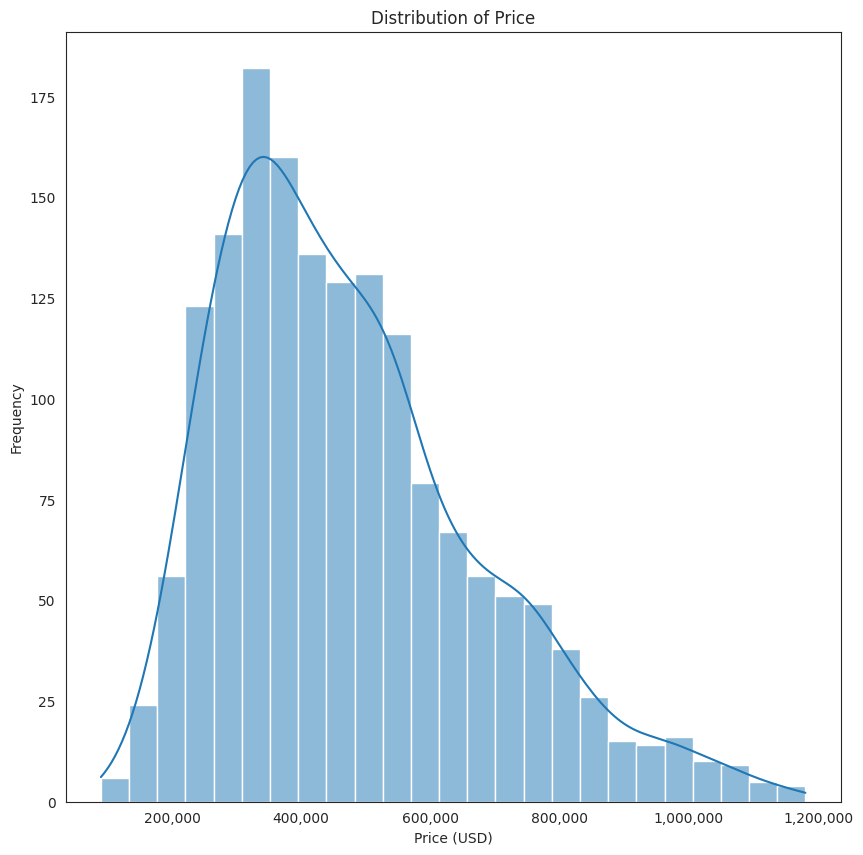

In [378]:
plt.figure(figsize=(10, 10))
sns.histplot(df['price'], palette='pastel', kde=True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

Price Based on City

In [369]:
# using groupby
data = df.groupby('city', as_index=False)['price'].mean().sort_values(by='price', ascending=False)
data

,city,price
7,Clyde Hill,"1,110,000.00"
20,Mercer Island,"869,790.75"
21,Newcastle,"737,795.06"
2,Bellevue,"710,419.76"
27,Sammamish,"703,358.57"
25,Redmond,"656,712.62"
22,Normandy Park,"630,250.00"
17,Kirkland,"614,636.20"
14,Issaquah,"564,390.76"
32,Snoqualmie,"547,200.49"


<ipython-input-370-beec21ab713a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='city', data=data, palette='muted')


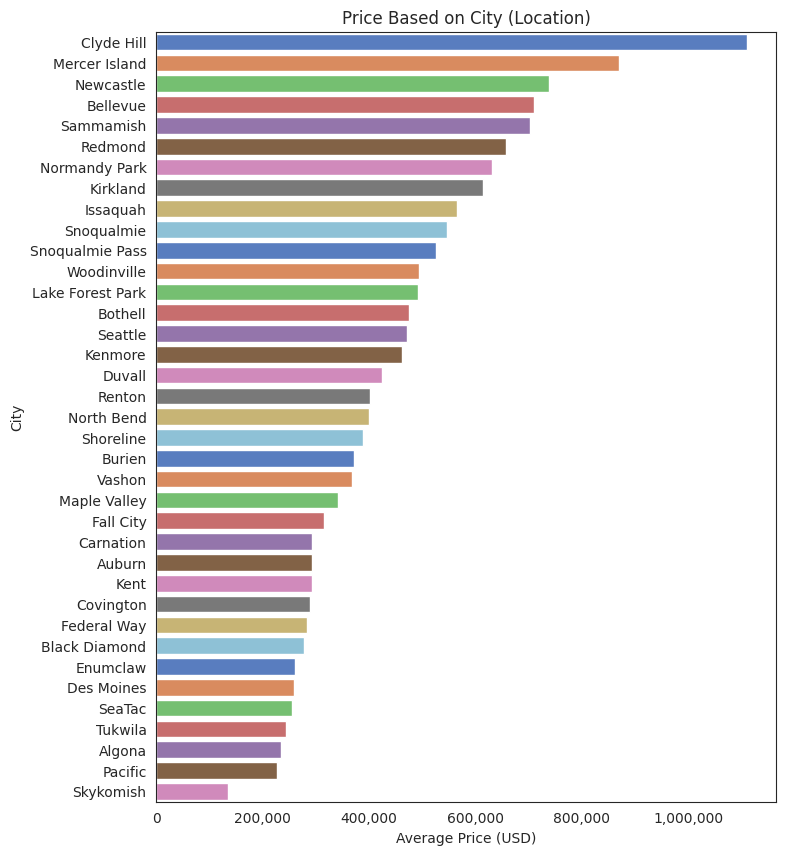

In [370]:
plt.figure(figsize=(8, 10))
sns.barplot(x='price', y='city', data=data, palette='muted')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price Based on City (Location)')
plt.xlabel('Average Price (USD)')
plt.ylabel('City')
plt.show()

Price based on Square Lot

<ipython-input-371-0624851f37f2>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sqft_lot', y='price', data=df, palette='pastel')


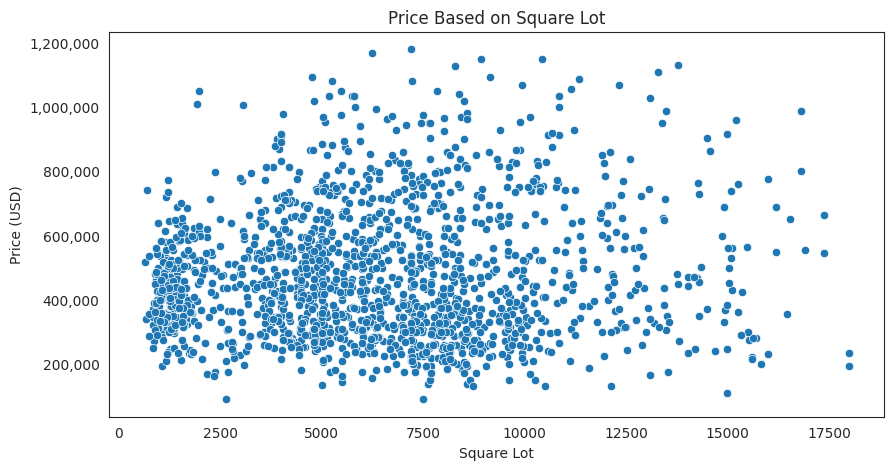

In [371]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_lot', y='price', data=df, palette='pastel')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price Based on Square Lot')
plt.xlabel('Square Lot')
plt.ylabel('Price (USD)')
plt.show()

Price based on Square Living

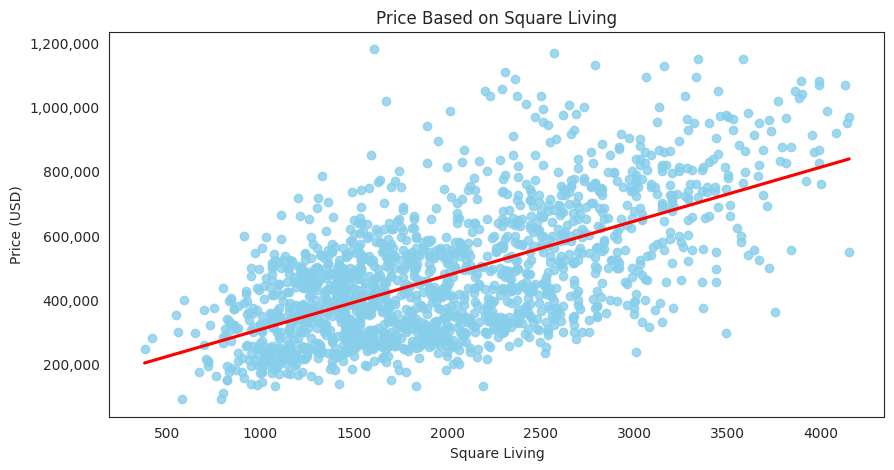

In [372]:
plt.figure(figsize=(10, 5))
sns.regplot(x='sqft_living', y='price', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'}, ci=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price Based on Square Living')
plt.xlabel('Square Living')
plt.ylabel('Price (USD)')
plt.show()

Price Trend Based on Year Built

<ipython-input-373-d7475d51ba9c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='yr_built', y='price', data=df, palette='pastel', errorbar=None)


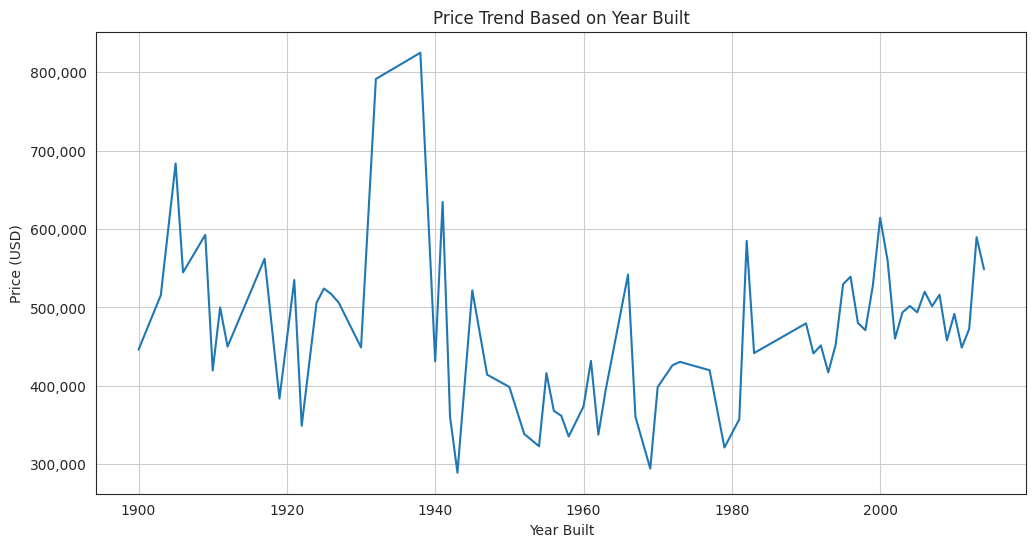

In [373]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='yr_built', y='price', data=df, palette='pastel', errorbar=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price Trend Based on Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Price Distribution Based on Bedroom

<ipython-input-374-7a19be4187d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=df, palette='pastel', errorbar=None)


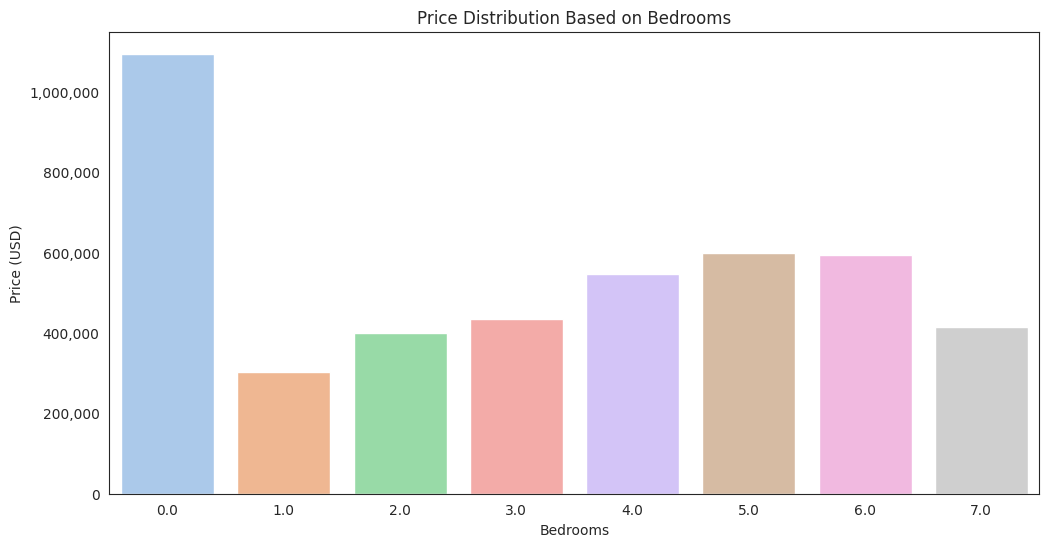

In [374]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='price', data=df, palette='pastel', errorbar=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel('Price (USD)')
plt.xlabel('Bedrooms')
plt.title('Price Distribution Based on Bedrooms')
plt.show()

Price Distribution Based on Bathroom

<ipython-input-375-6812262926b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bathrooms', y='price', data=df, palette='deep', errorbar=None)


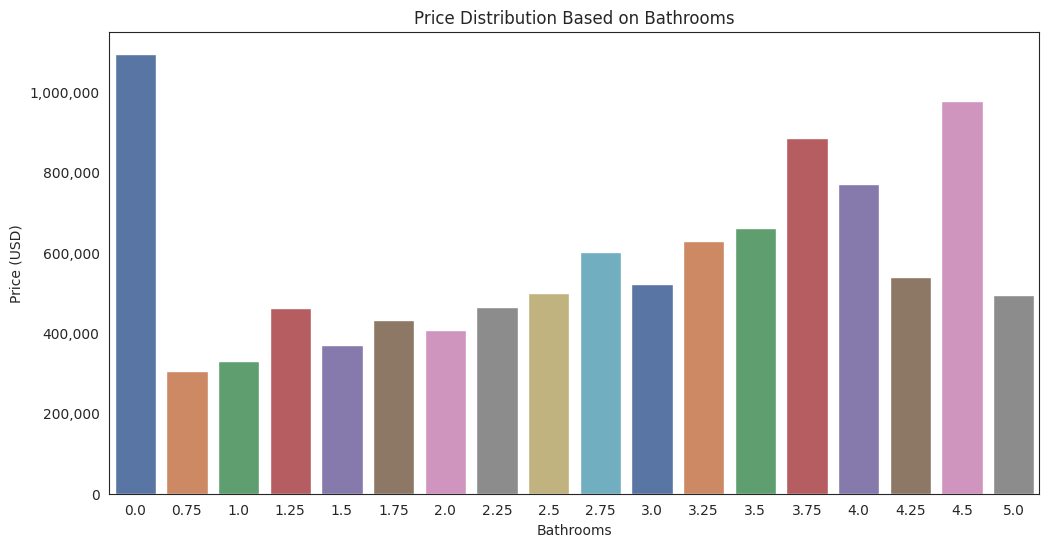

In [375]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bathrooms', y='price', data=df, palette='deep', errorbar=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel('Price (USD)')
plt.xlabel('Bathrooms')
plt.title('Price Distribution Based on Bathrooms')
plt.show()

Price Distribution Based on Waterfront

<ipython-input-376-22aa56080ac4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waterfront', y='price', data=df, palette='dark', errorbar=None)


Text(0.5, 1.0, 'Price Distribution Based on Waterfront')

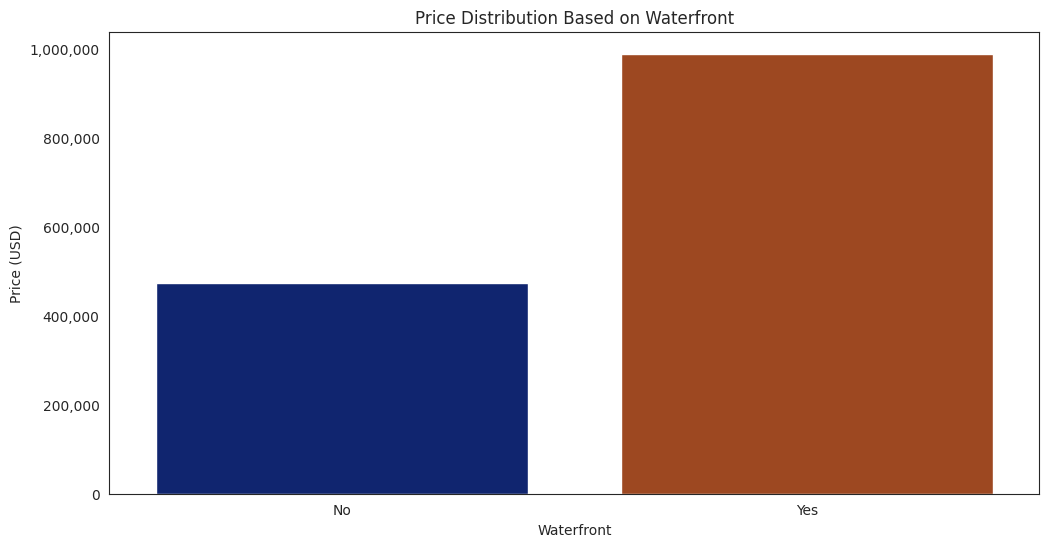

In [376]:
plt.figure(figsize=(12, 6))
sns.barplot(x='waterfront', y='price', data=df, palette='dark', errorbar=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Price (USD)')
plt.xlabel('Waterfront')
plt.title('Price Distribution Based on Waterfront')

Condition

<ipython-input-377-88d9d30f6c54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='condition', y='price', data=df, palette='pastel', errorbar=None)


Text(0.5, 1.0, 'Price Distribution Based on Condition')

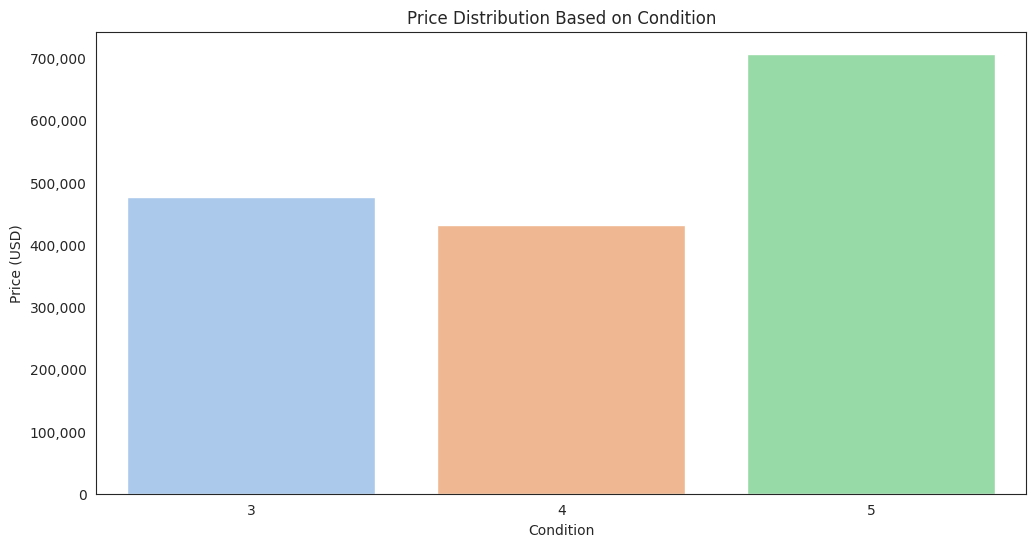

In [377]:
plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='price', data=df, palette='pastel', errorbar=None)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.ylabel('Price (USD)')
plt.xlabel('Condition')
plt.title('Price Distribution Based on Condition')

View

Pair Plot

# Recommendation for Mr. Cho

Based on Price

In [408]:
df_city = df.sort_values(by='price', ascending=False)
df_city[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'condition', 'view', 'street','city']].head()

,price,bedrooms,bathrooms,sqft_living,waterfront,condition,view,street,city
1186,"1,180,500.00",3.00,1.75,1610,0,3,0,1015 36th Ave E,Seattle
2670,"1,170,000.00",4.00,2.50,2570,0,3,0,1915 107th Ave SE,Bellevue
3720,"1,150,000.00",4.00,2.50,3340,0,3,0,10640 NE 46th St,Kirkland
3946,"1,150,000.00",5.00,2.50,3580,0,3,0,409 20th Ave,Kirkland
4049,"1,131,000.00",3.00,2.25,2790,0,3,3,18125 Brittany Dr SW,Normandy Park


In [418]:
df_city = df.sort_values(by='price', ascending=True)
df_city[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'condition', 'view', 'street','city']].head()

,price,bedrooms,bathrooms,sqft_living,waterfront,condition,view,street,city
588,"90,000.00",2.00,1.00,790,0,3,0,14710 122nd Pl NE,Kirkland
1283,"90,000.00",2.00,1.00,580,0,3,0,6621 S 131st Pl,Seattle
2329,"110,000.00",2.00,1.00,800,0,3,0,12231 14th Ave S,Seattle
4462,"132,250.00",4.00,2.25,2192,0,3,0,26429 106th Ave SE,Kent
4560,"132,250.00",4.00,2.25,1830,0,4,0,12116 SE 261st Ct,Kent


Based on Squarefeet Living

In [407]:
df_living = df.sort_values(by='sqft_living', ascending=False)
df_living[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'street','city']].head()

,price,bedrooms,bathrooms,sqft_living,condition,street,city
3574,"550,000.00",4.00,3.50,4150,3,11824 SE 290th Pl,Auburn
2073,"969,990.00",4.00,2.50,4150,3,3324 225th Ave SE,Sammamish
1555,"950,000.00",4.00,3.50,4140,3,8507 146th Pl SE,Newcastle
1761,"1,070,000.00",4.00,3.75,4130,3,14212 SE 92nd St,Newcastle
3787,"920,000.00",4.00,3.50,4080,3,8950 237th Pl NE,Redmond


Based on Some Criteria

In [410]:
df_bathroom = df[
    (df['bedrooms'] >= 2) &
    (df['bathrooms'] >= 2)
]

# Optionally sort by price
df_bathroom = df_bathroom.sort_values(by='price', ascending=True)

# Show top 5 recommendations
df_bathroom[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'street', 'city']].head()

,price,bedrooms,bathrooms,sqft_lot,street,city
4560,"132,250.00",4.00,2.25,8734,12116 SE 261st Ct,Kent
4462,"132,250.00",4.00,2.25,12128,26429 106th Ave SE,Kent
1189,"168,000.00",2.00,2.50,2174,8601-8633 26th Ave SW,Seattle
3835,"175,000.00",4.00,2.50,6000,2401-2499 S 244th St,Des Moines
2785,"180,000.00",3.00,2.25,6350,24433 14th Ave S,Des Moines


With Waterfront and Good View

In [415]:
df_waterfront = df[
    (df['waterfront'] == 1) &
    (df['view'] == 4)
]

df_waterfront = df_waterfront.sort_values(by='price', ascending=True)

df_waterfront[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'view', 'street', 'city']].head()

,price,bedrooms,bathrooms,sqft_lot,view,street,city
381,"988,500.00",3.00,2.75,16807,4,2973-3563 SW 172nd St,Burien


Based on City

In [422]:
df_city = df[df['city'] == 'Seattle']
df_city = df_city.sort_values(by='price', ascending=True)
df_city[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'street', 'city']].head()

,price,bedrooms,bathrooms,sqft_lot,street,city
1283,"90,000.00",2.00,1.00,7500,6621 S 131st Pl,Seattle
2329,"110,000.00",2.00,1.00,15000,12231 14th Ave S,Seattle
928,"137,000.00",3.00,1.00,7620,9445 8th Ave SW,Seattle
1236,"149,000.00",3.00,1.00,8645,12701 2nd Ave SW,Seattle
1447,"150,000.00",3.00,1.00,7680,8408 20th Ave SW,Seattle
